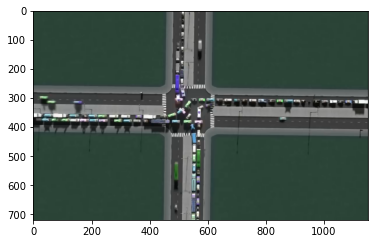

A=6
B=7
C=13
D=20
j=6
52
d=2
bc=3
cd=3
da=1
ac=2
bd=3
ca=2
db=3
ad=0
ba=0
cb=2
dc=1
A=8
B=7
C=10
D=26
j=10
61
d=2
bc=3
cd=3
da=3
ac=2
bd=4
ca=1
db=5
ad=0
ba=0
cb=2
dc=0
A=13
B=6
C=9
D=20
j=8
56
d=3
bc=2
cd=5
da=3
ac=4
bd=3
ca=1
db=4
ad=1
ba=0
cb=1
dc=0
A=12
B=7
C=11
D=22
j=9
61
d=3
bc=2
cd=5
da=4
ac=3
bd=4
ca=2
db=5
ad=1
ba=0
cb=3
dc=0
A=10
B=4
C=8
D=20
j=12
54
d=3
bc=2
cd=4
da=3
ac=2
bd=5
ca=3
db=6
ad=1
ba=0
cb=3
dc=0
A=12
B=3
C=10
D=23
j=10
58
d=3
bc=3
cd=3
da=3
ac=2
bd=3
ca=5
db=5
ad=1
ba=0
cb=3
dc=0
A=11
B=4
C=10
D=20
j=12
57
d=2
bc=4
cd=3
da=2
ac=2
bd=4
ca=8
db=6
ad=1
ba=0
cb=2
dc=0
A=12
B=1
C=12
D=21
j=8
54
d=2
bc=1
cd=2
da=2
ac=1
bd=3
ca=4
db=3
ad=1
ba=0
cb=2
dc=0
A=11
B=1
C=12
D=26
j=5
55
d=3
bc=0
cd=2
da=2
ac=2
bd=1
ca=3
db=1
ad=0
ba=0
cb=1
dc=0
A=15
B=2
C=7
D=24
j=6
54
d=4
bc=1
cd=2
da=2
ac=2
bd=2
ca=4
db=1
ad=0
ba=1
cb=1
dc=0
A=9
B=5
C=9
D=28
j=4
55
d=4
bc=1
cd=2
da=2
ac=1
bd=2
ca=2
db=2
ad=0
ba=1
cb=2
dc=0
A=9
B=6
C=10
D=17
j=6
48
d=4
bc=3
cd=2
da=3
ac=3
bd=3
ca=2
db=3
ad=0

In [1]:
import cv2
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
cap = cv.VideoCapture('road.mp4')
ret, frame1 = cap.read()
ret, frame2 = cap.read()
plt.imshow(frame1)
plt.show()
def finding_contours(img1, img2):
    difference_in_images = cv.absdiff(img1, img2)
    grayed_image = cv.cvtColor(difference_in_images, cv.COLOR_BGR2GRAY)
    image_in_blur = cv.GaussianBlur(grayed_image, (5, 5), 0)
    _, threshold_for_image = cv.threshold(image_in_blur, 20, 255, cv.THRESH_BINARY)
    dilated_img = cv.dilate(threshold_for_image, None, iterations=3)
    contours_for_image, _ = cv.findContours(dilated_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    return contours_for_image

def tracking(frame, vertices):
    mask = np.zeros_like(frame)
    channel_count = frame.shape[2]
    match_mask_color = (255,) * channel_count
    cv.fillPoly(mask, vertices, match_mask_color)
    #cv.fillPoly(mask, vertices, 255)

    masked_img = cv.bitwise_and(frame, mask)
    return masked_img
while cap.isOpened():
    ret, frame2 = cap.read()

    height1 = frame1.shape[0]
    height2 = frame2.shape[0]

    width1 = frame1.shape[1]
    width2 = frame2.shape[1]

#  ABCD LANES
    roi_of_a = [(0, 0), (536, 268), (1140, 0)]
    roi_of_b = [(605, 330), (1140, 0), (1150, 720)]

    roi_of_c = [(0, 720), (524, 412), (1150, 720)]
    roi_of_d = [(0, 0), (462, 331), (0, 720)]

#  JUNCTION
    roi_of_j = [(462, 410), (534, 260), (594, 410)]

#  CROSSING VEHICLES
    roi_of_ab = [(499, 261), (613, 363), (613, 400)]
    roi_of_bc = [(464, 421), (613, 305), (520, 433)]
    roi_of_cd = [(450, 324), (450, 273), (566, 426)]
    roi_of_da = [(448, 354), (543, 254), (596, 259)]

    roi_of_ac = [(473, 435), (494, 249), (510, 431)]
    roi_of_bd = [(452, 284), (615, 310), (455, 338)]
    roi_of_ca = [(548, 263), (573, 426), (594, 259)]
    roi_of_db = [(448, 377), (613, 349), (620, 400)]

    roi_of_ad = [(438, 289), (494, 254), (450, 328)]
    roi_of_ba = [(552, 254), (606, 314), (592, 254)]
    roi_of_cb = [(548, 414), (615, 366), (615, 407)]
    roi_of_dc = [(448, 382), (476, 431), (520, 431)]

#  cropped img for lanes

    cropped_imga1 = tracking(frame1, np.array([roi_of_a], np.int32), )
    cropped_imga2 = tracking(frame2, np.array([roi_of_a], np.int32), )

    cropped_imgb1 = tracking(frame1, np.array([roi_of_b], np.int32), )
    cropped_imgb2 = tracking(frame2, np.array([roi_of_b], np.int32), )

    cropped_imgc1 = tracking(frame1, np.array([roi_of_c], np.int32), )
    cropped_imgc2 = tracking(frame2, np.array([roi_of_c], np.int32), )

    cropped_imgd1 = tracking(frame1, np.array([roi_of_d], np.int32), )
    cropped_imgd2 = tracking(frame2, np.array([roi_of_d], np.int32), )

    cropped_imgj1 = tracking(frame1, np.array([roi_of_j], np.int32), )
    cropped_imgj2 = tracking(frame2, np.array([roi_of_j], np.int32), )


#  cropped img for crossing vehicles
    cropped_imgab1 = tracking(frame1, np.array([roi_of_ab], np.int32), )
    cropped_imgab2 = tracking(frame2, np.array([roi_of_ab], np.int32), )
    cropped_imgbc1 = tracking(frame1, np.array([roi_of_bc], np.int32), )
    cropped_imgbc2 = tracking(frame2, np.array([roi_of_bc], np.int32), )
    cropped_imgcd1 = tracking(frame1, np.array([roi_of_cd], np.int32), )
    cropped_imgcd2 = tracking(frame2, np.array([roi_of_cd], np.int32), )
    cropped_imgda1 = tracking(frame1, np.array([roi_of_da], np.int32), )
    cropped_imgda2 = tracking(frame2, np.array([roi_of_da], np.int32), )

    cropped_imgac1 = tracking(frame1, np.array([roi_of_ac], np.int32), )
    cropped_imgac2 = tracking(frame2, np.array([roi_of_ac], np.int32), )
    cropped_imgbd1 = tracking(frame1, np.array([roi_of_bd], np.int32), )
    cropped_imgbd2 = tracking(frame2, np.array([roi_of_bd], np.int32), )
    cropped_imgca1 = tracking(frame1, np.array([roi_of_ca], np.int32), )
    cropped_imgca2 = tracking(frame2, np.array([roi_of_ca], np.int32), )
    cropped_imgdb1 = tracking(frame1, np.array([roi_of_db], np.int32), )
    cropped_imgdb2 = tracking(frame2, np.array([roi_of_db], np.int32), )

    cropped_imgad1 = tracking(frame1, np.array([roi_of_ad], np.int32), )
    cropped_imgad2 = tracking(frame2, np.array([roi_of_ad], np.int32), )
    cropped_imgba1 = tracking(frame1, np.array([roi_of_ba], np.int32), )
    cropped_imgba2 = tracking(frame2, np.array([roi_of_ba], np.int32), )
    cropped_imgcb1 = tracking(frame1, np.array([roi_of_cb], np.int32), )
    cropped_imgcb2 = tracking(frame2, np.array([roi_of_cb], np.int32), )
    cropped_imgdc1 = tracking(frame1, np.array([roi_of_dc], np.int32), )
    cropped_imgdc2 = tracking(frame2, np.array([roi_of_dc], np.int32), )



# gray  and  canny img for road lanes

    gray_a1 = cv.cvtColor(cropped_imga1, cv.COLOR_BGR2GRAY)
    canny_imga1 = cv.Canny(gray_a1, 100, 200)
    gray_a2 = cv.cvtColor(cropped_imga2, cv.COLOR_BGR2GRAY)
    canny_imga2 = cv.Canny(gray_a2, 100, 200)

    gray_b1 = cv.cvtColor(cropped_imgb1, cv.COLOR_BGR2GRAY)
    canny_imgb1 = cv.Canny(gray_b1, 100, 200)
    gray_b2 = cv.cvtColor(cropped_imgb2, cv.COLOR_BGR2GRAY)
    canny_imgb2 = cv.Canny(gray_b2, 100, 200)

    gray_c1 = cv.cvtColor(cropped_imga1, cv.COLOR_BGR2GRAY)
    canny_imgc1 = cv.Canny(gray_c1, 100, 200)
    gray_c2 = cv.cvtColor(cropped_imgc2, cv.COLOR_BGR2GRAY)
    canny_imgc2 = cv.Canny(gray_c2, 100, 200)

    gray_d1 = cv.cvtColor(cropped_imgd1, cv.COLOR_BGR2GRAY)
    canny_imgd1 = cv.Canny(gray_d1, 100, 200)
    gray_d2 = cv.cvtColor(cropped_imgd2, cv.COLOR_BGR2GRAY)
    canny_imgd2 = cv.Canny(gray_d2, 100, 200)

    gray_j1 = cv.cvtColor(cropped_imgj1, cv.COLOR_BGR2GRAY)
    canny_imgj1 = cv.Canny(gray_j1, 100, 200)
    gray_j2 = cv.cvtColor(cropped_imgj2, cv.COLOR_BGR2GRAY)
    canny_imgj2 = cv.Canny(gray_j2, 100, 200)


#   gray and canny img for crossing vehicles
    gray_ab1 = cv.cvtColor(cropped_imgab1, cv.COLOR_BGR2GRAY)
    canny_imgab1 = cv.Canny(gray_ab1, 100, 200)
    gray_ab2 = cv.cvtColor(cropped_imgab2, cv.COLOR_BGR2GRAY)
    canny_imgab2 = cv.Canny(gray_ab2, 100, 200)

    gray_bc1 = cv.cvtColor(cropped_imgbc1, cv.COLOR_BGR2GRAY)
    canny_imgbc1 = cv.Canny(gray_bc1, 100, 200)
    gray_bc2 = cv.cvtColor(cropped_imgbc2, cv.COLOR_BGR2GRAY)
    canny_imgbc2 = cv.Canny(gray_bc2, 100, 200)

    gray_cd1 = cv.cvtColor(cropped_imgcd1, cv.COLOR_BGR2GRAY)
    canny_imgcd1 = cv.Canny(gray_cd1, 100, 200)
    gray_cd2 = cv.cvtColor(cropped_imgcd2, cv.COLOR_BGR2GRAY)
    canny_imgcd2 = cv.Canny(gray_cd2, 100, 200)

    gray_da1 = cv.cvtColor(cropped_imgda1, cv.COLOR_BGR2GRAY)
    canny_imgda1 = cv.Canny(gray_da1, 100, 200)
    gray_da2 = cv.cvtColor(cropped_imgda2, cv.COLOR_BGR2GRAY)
    canny_imgda2 = cv.Canny(gray_da2, 100, 200)



    gray_ac1 = cv.cvtColor(cropped_imgac1, cv.COLOR_BGR2GRAY)
    canny_imgac1 = cv.Canny(gray_ac1, 100, 200)
    gray_ac2 = cv.cvtColor(cropped_imgac2, cv.COLOR_BGR2GRAY)
    canny_imgac2 = cv.Canny(gray_ac2, 100, 200)

    gray_bd1 = cv.cvtColor(cropped_imgbd1, cv.COLOR_BGR2GRAY)
    canny_imgbd1 = cv.Canny(gray_bd1, 100, 200)
    gray_bd2 = cv.cvtColor(cropped_imgbd2, cv.COLOR_BGR2GRAY)
    canny_imgbd2 = cv.Canny(gray_bd2, 100, 200)

    gray_ca1 = cv.cvtColor(cropped_imgca1, cv.COLOR_BGR2GRAY)
    canny_imgca1 = cv.Canny(gray_ca1, 100, 200)
    gray_ca2 = cv.cvtColor(cropped_imgca2, cv.COLOR_BGR2GRAY)
    canny_imgca2 = cv.Canny(gray_ca2, 100, 200)

    gray_db1 = cv.cvtColor(cropped_imgdb1, cv.COLOR_BGR2GRAY)
    canny_imgdb1 = cv.Canny(gray_db1, 100, 200)
    gray_db2 = cv.cvtColor(cropped_imgdb2, cv.COLOR_BGR2GRAY)
    canny_imgdb2 = cv.Canny(gray_db2, 100, 200)



    gray_ad1 = cv.cvtColor(cropped_imgad1, cv.COLOR_BGR2GRAY)
    canny_imgad1 = cv.Canny(gray_ad1, 100, 200)
    gray_ad2 = cv.cvtColor(cropped_imgad2, cv.COLOR_BGR2GRAY)
    canny_imgad2 = cv.Canny(gray_ad2, 100, 200)

    gray_ba1 = cv.cvtColor(cropped_imgba1, cv.COLOR_BGR2GRAY)
    canny_imgba1 = cv.Canny(gray_ba1, 100, 200)
    gray_ba2 = cv.cvtColor(cropped_imgba2, cv.COLOR_BGR2GRAY)
    canny_imgba2 = cv.Canny(gray_ba2, 100, 200)

    gray_cd1 = cv.cvtColor(cropped_imgcd1, cv.COLOR_BGR2GRAY)
    canny_imgcd1 = cv.Canny(gray_cd1, 100, 200)
    gray_cd2 = cv.cvtColor(cropped_imgcd2, cv.COLOR_BGR2GRAY)
    canny_imgcd2 = cv.Canny(gray_cd2, 100, 200)

    gray_da1 = cv.cvtColor(cropped_imgda1, cv.COLOR_BGR2GRAY)
    canny_imgda1 = cv.Canny(gray_da1, 100, 200)
    gray_da2 = cv.cvtColor(cropped_imgda2, cv.COLOR_BGR2GRAY)
    canny_imgda2 = cv.Canny(gray_da2, 100, 200)


    contours_a = finding_contours(cropped_imga1, cropped_imga2)
    a = len(contours_a)
    print('A=' +  str(a))
    z = a
    for contour in contours_a:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv.putText(frame1, 'A=' + str(a), (530, 40), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

        #cv.drawContours(cropped_imga1, contours_a, -1, (0, 255, 0), 5)

    contours_b = finding_contours(cropped_imgb1, cropped_imgb2)
    b = len(contours_b)
    print('B=' + str(b))
    z += b
    for contour in contours_b:
            (x, y, w, h) = cv2.boundingRect(contour)
            if cv.contourArea(contour) > 250:
                continue
            else:
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv.putText(frame1, "B="+str(b), (1000, 350), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

            #cv.drawContours(cropped_imgb1, contours_b, -1, (0, 255, 0), 5)

    contours_c = finding_contours(cropped_imgc1, cropped_imgc2)
    c = len(contours_c)
    print('C=' + str(c))
    z += c
    for contour in contours_c:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv.putText(frame1, "C=" + str(c), (530, 680), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

        #cv.drawContours(cropped_imgc1, contours_c, -1, (0, 255, 0), 5)

    contours_d = finding_contours(cropped_imgd1, cropped_imgd2)
    d = len(contours_d)
    print('D=' + str(d))
    z += d
    for contour in contours_d:
            (x, y, w, h) = cv2.boundingRect(contour)
            if cv.contourArea(contour) > 250:
                continue
            else:
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            #cv.drawContours(cropped_imgd1, contours_d, -1, (0, 255, 0), 5)
                cv.putText(frame1, 'D='+str(d), (30, 345), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

    contours_j = finding_contours(cropped_imgj1, cropped_imgj2)
    j = len(contours_j)
    print('j=' + str(j))
    z += j
    for contour in contours_j:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)

    print(z)
    cv.putText(frame1, 'TOTAL_MOVING_VEHICLES=' + str(z), (370, 225), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3)

    #   contour for crossing vehicles

    contours_ab = finding_contours(cropped_imgab1, cropped_imgab2)
    ab = len(contours_ab)
    print('d=' + str(ab))
    for contour in contours_ab:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv.drawContours(cropped_imgd1, contours_d, -1, (0, 255, 0), 5)
            cv.putText(frame1, 'A TO B=' + str(ab), (715, 75), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    contours_bc = finding_contours(cropped_imgbc1, cropped_imgbc2)
    bc = len(contours_bc)
    print('bc=' + str(bc))
    for contour in contours_bc:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv.drawContours(cropped_imgd1, contours_d, -1, (0, 255, 0), 5)
            cv.putText(frame1, 'B TO C=' + str(bc), (715, 480), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    contours_cd = finding_contours(cropped_imgcd1, cropped_imgcd2)
    cd = len(contours_cd)
    print('cd=' + str(cd))
    for contour in contours_cd:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv.drawContours(cropped_imgd1, contours_d, -1, (0, 255, 0), 5)
            cv.putText(frame1, 'C TO D=' + str(cd), (65, 480), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    contours_da = finding_contours(cropped_imgda1, cropped_imgda2)
    da = len(contours_da)
    print('da=' + str(da))
    for contour in contours_da:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv.drawContours(cropped_imgd1, contours_d, -1, (0, 255, 0), 5)
            cv.putText(frame1, 'D TO A=' + str(da), (65, 75), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    contours_ac = finding_contours(cropped_imgac1, cropped_imgac2)
    ac = len(contours_ac)
    print('ac=' + str(ac))
    for contour in contours_ac:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv.drawContours(cropped_imgd1, contours_d, -1, (0, 255, 0), 5)
            cv.putText(frame1, 'A TO C=' + str(ac), (715, 125), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    contours_bd = finding_contours(cropped_imgbd1, cropped_imgbd2)
    bd = len(contours_bd)
    print('bd=' + str(bd))
    for contour in contours_bd:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv.drawContours(cropped_imgd1, contours_d, -1, (0, 255, 0), 5)
            cv.putText(frame1, 'B TO D=' + str(bd), (715, 530), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    contours_ca = finding_contours(cropped_imgca1, cropped_imgca2)
    ca = len(contours_ca)
    print('ca=' + str(ca))
    for contour in contours_ca:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv.drawContours(cropped_imgd1, contours_d, -1, (0, 255, 0), 5)
            cv.putText(frame1, 'C TO A=' + str(ca), (65, 530), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    contours_db = finding_contours(cropped_imgdb1, cropped_imgdb2)
    db = len(contours_db)
    print('db=' + str(db))
    for contour in contours_db:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv.drawContours(cropped_imgd1, contours_d, -1, (0, 255, 0), 5)
            cv.putText(frame1, 'D TO B=' + str(db), (65, 125), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    contours_ad = finding_contours(cropped_imgad1, cropped_imgad2)
    ad = len(contours_ad)
    print('ad=' + str(ad))
    for contour in contours_ad:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv.drawContours(cropped_imgd1, contours_d, -1, (0, 255, 0), 5)
            cv.putText(frame1, 'A TO D=' + str(ad), (715, 175), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    contours_ba = finding_contours(cropped_imgba1, cropped_imgba2)
    ba = len(contours_ba)
    print('ba=' + str(ba))
    for contour in contours_ba:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv.drawContours(cropped_imgd1, contours_d, -1, (0, 255, 0), 5)
            cv.putText(frame1, 'B TO A=' + str(ba), (715, 580), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    contours_cb = finding_contours(cropped_imgcb1, cropped_imgcb2)
    cb = len(contours_cb)
    print('cb=' + str(cb))
    for contour in contours_cb:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv.drawContours(cropped_imgd1, contours_d, -1, (0, 255, 0), 5)
            cv.putText(frame1, 'C TO B=' + str(cb), (65, 580), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    contours_dc = finding_contours(cropped_imgdc1, cropped_imgdc2)
    dc = len(contours_dc)
    print('dc=' + str(dc))
    for contour in contours_dc:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv.contourArea(contour) > 250:
            continue
        else:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv.drawContours(cropped_imgd1, contours_d, -1, (0, 255, 0), 5)
            cv.putText(frame1, 'D TO C=' + str(dc), (65, 175), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)



    cv.imshow('ROAD TRAFFIC', frame1)
    ret, frame1 = cap.read()
    if cv.waitKey(100) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()